## Feature Engineering
<b>ML pipe line</b>
1. data collection 
2. EDA
3. Feature engineering (preprocessing)
4. model building
5. evaluation 

<br>
Feature engineering, in data science, refers to manipulation — addition, deletion, combination, mutation — of your data set to improve machine learning model training, leading to better performance and greater accuracy.<br>

<b>Feature engineering is the creation of features from raw data</b>. Feature engineering includes: Determining required features for ML mode. Analysis for understanding statistics, distribution, implementing one hot encoding and imputation, and more. Tools like Python and Python libraries are used.<br>

Feature Engg:-
1. Feature Transformation
    * Missing value handling
    * outlier handling
    * Scaling
    * Encoding (categorical to--> numerical data )
    * Mathematical transformation
2. Feature construction
    * for example in titanic dataset there are two columns srbsap and parch the<br> can combined as a family
3. Feature selection
4. Feature Extraction
5. Feature scaling : reducing the scale of the data 

In [90]:
import pandas as pd

In [91]:
df=pd.read_csv("https://raw.githubusercontent.com/sharmaroshan/Social-Networks-Ads/master/Social_Network_Ads.csv")

In [92]:
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19.0,19000.0,0
1,15810944,Male,35.0,20000.0,0
2,15668575,Female,26.0,43000.0,0
3,15603246,Female,27.0,57000.0,0
4,15804002,Male,19.0,76000.0,0


In [93]:
df.to_csv("social_net_ads.csv",index=False)

## Scaling 
only done on numeric data not on categorical data 

extracting the two column from te data(age and salary)

In [94]:
df = df.iloc[:,2:] #required data extraction 

In [95]:
df

,Age,EstimatedSalary,Purchased
0,19.0,19000.0,0
1,35.0,20000.0,0
2,26.0,43000.0,0
3,27.0,57000.0,0
4,19.0,76000.0,0
...,...,...,...
395,46.0,41000.0,1
396,51.0,23000.0,1
397,50.0,20000.0,1
398,36.0,33000.0,0


## Data 
* Train Data - to train the model
* Test/ Validation data - to testing the model 

#### Data leakage
to avoid the data leakage we divide data into train and test data 

### <b>Train and test split</b>

In [96]:
from sklearn.model_selection import train_test_split

Age & EstimatedSalary :- independent column<br>
Purchased :- Dependent column

In [97]:
df

,Age,EstimatedSalary,Purchased
0,19.0,19000.0,0
1,35.0,20000.0,0
2,26.0,43000.0,0
3,27.0,57000.0,0
4,19.0,76000.0,0
...,...,...,...
395,46.0,41000.0,1
396,51.0,23000.0,1
397,50.0,20000.0,1
398,36.0,33000.0,0


In [98]:
df.drop("Purchased",axis=1)

,Age,EstimatedSalary
0,19.0,19000.0
1,35.0,20000.0
2,26.0,43000.0
3,27.0,57000.0
4,19.0,76000.0
...,...,...
395,46.0,41000.0
396,51.0,23000.0
397,50.0,20000.0
398,36.0,33000.0


In [99]:
df["Purchased"]

0      0
1      0
2      0
3      0
4      0
      ..
395    1
396    1
397    1
398    0
399    1
Name: Purchased, Length: 400, dtype: int64

In [100]:
X_train,X_test,y_train,y_test=train_test_split(df.drop("Purchased",axis=1),df["Purchased"],test_size=0.25)

In [101]:
y_train

256    0
343    1
259    1
177    0
54     0
      ..
339    1
341    0
295    0
98     0
186    0
Name: Purchased, Length: 300, dtype: int64

### Standard Scaler

In [102]:
from sklearn.preprocessing import StandardScaler

In [103]:
scaler=StandardScaler()

to avoid data leakage inside the data . fit transform is done on train data 

In [104]:
scaler.fit(X_train)        #fit = it calculate mean and SD    

StandardScaler()

In [105]:
X_train_scaled = scaler.transform(X_train)

In [106]:
X_test_scaled = scaler.transform(X_test)

In [107]:
X_train_scaled=pd.DataFrame(X_train_scaled,columns=X_train.columns)

In [108]:
X_train

,Age,EstimatedSalary
256,41.0,72000.0
343,47.0,51000.0
259,45.0,131000.0
177,25.0,22000.0
54,27.0,58000.0
...,...,...
339,39.0,122000.0
341,35.0,75000.0
295,36.0,63000.0
98,35.0,73000.0


In [109]:
X_train.describe()

,Age,EstimatedSalary
count,300.000000,300.000000
mean,37.906667,69486.666667
std,10.412140,34533.631839
min,18.000000,15000.000000
25%,30.000000,43000.000000
50%,37.000000,67000.000000
75%,46.000000,87000.000000
max,60.000000,150000.000000


In [110]:
X_train_scaled

,Age,EstimatedSalary
0,0.297585,0.072901
1,0.874799,-0.536218
2,0.682394,1.784235
3,-1.241650,-1.377382
4,-1.049245,-0.333178
...,...,...
295,0.105181,1.523184
296,-0.279628,0.159918
297,-0.183426,-0.188150
298,-0.279628,0.101907


In [111]:
import numpy as np
np.round(X_train_scaled.describe(),1)

,Age,EstimatedSalary
count,300.0,300.0
mean,0.0,-0.0
std,1.0,1.0
min,-1.9,-1.6
25%,-0.8,-0.8
50%,-0.1,-0.1
75%,0.8,0.5
max,2.1,2.3


### Effect of the sacling on the data

In [112]:
import matplotlib.pyplot as plt

Text(0.5, 1.0, 'After Scaling')

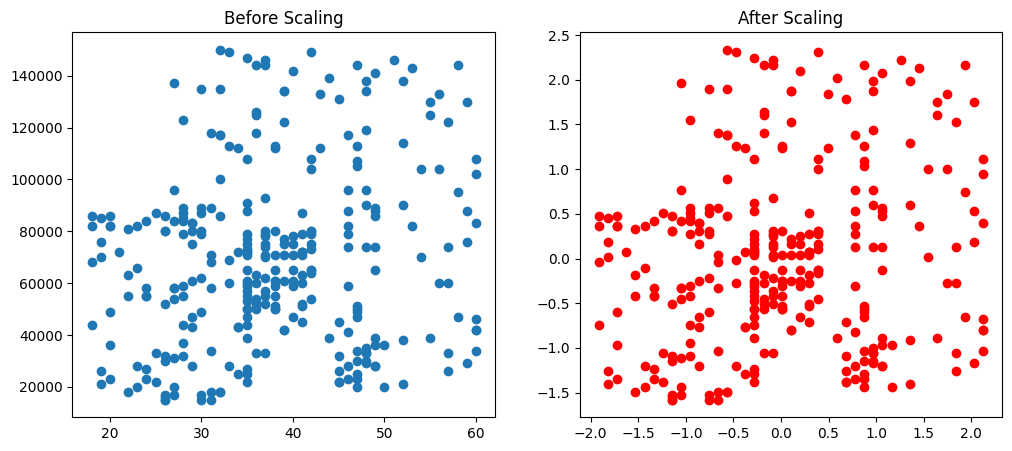

In [113]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))

ax1.scatter(X_train['Age'], X_train['EstimatedSalary'])
ax1.set_title("Before Scaling")

ax2.scatter(X_train_scaled['Age'], X_train_scaled['EstimatedSalary'],color='red')
ax2.set_title("After Scaling")



Data is same even after scalling just range/scale is chnaged <b>↑</b><br>

<br>

Done this becouse model training required small scale data for better accuracy

<Axes: xlabel='EstimatedSalary', ylabel='Density'>

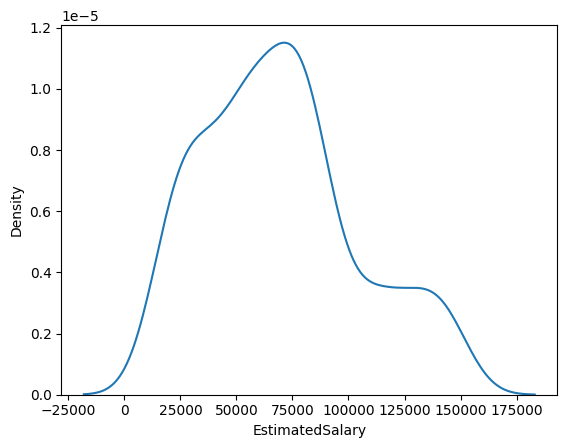

In [114]:
import seaborn as sns
sns.kdeplot(X_train["EstimatedSalary"])

<Axes: xlabel='EstimatedSalary', ylabel='Density'>

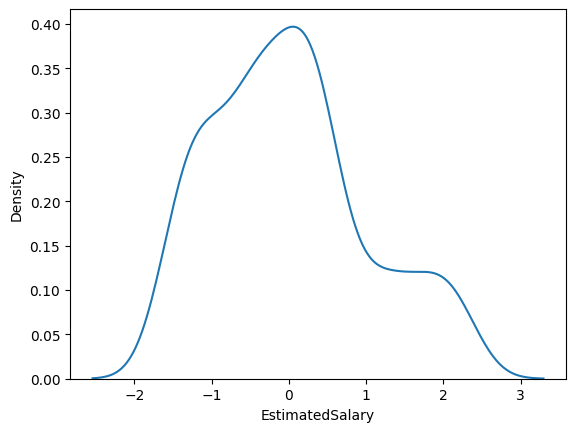

In [115]:
sns.kdeplot(X_train_scaled["EstimatedSalary"])

### Min-max scaler

In [116]:
from sklearn.preprocessing import MinMaxScaler

In [117]:
scaler_min_max = MinMaxScaler()

In [118]:
scaler_min_max.fit(X_train)

MinMaxScaler()

In [119]:
X_train_minmax = scaler_min_max.transform(X_train)

In [120]:
X_test_minmax = scaler_min_max.transform(X_test)

In [121]:
X_train_minmax = pd.DataFrame(X_train_minmax,columns=X_train.columns)
X_test_minmax = pd.DataFrame(X_test_minmax,columns=X_test.columns)

In [122]:
X_train_minmax

,Age,EstimatedSalary
0,0.547619,0.422222
1,0.690476,0.266667
2,0.642857,0.859259
3,0.166667,0.051852
4,0.214286,0.318519
...,...,...
295,0.500000,0.792593
296,0.404762,0.444444
297,0.428571,0.355556
298,0.404762,0.429630


In [123]:
X_test_minmax

,Age,EstimatedSalary
0,0.285714,0.681481
1,0.071429,0.392593
2,0.380952,0.740741
3,0.261905,0.207407
4,0.714286,0.859259
...,...,...
95,0.547619,0.111111
96,0.952381,0.637037
97,0.190476,0.511111
98,0.142857,0.548148


In [124]:
np.round(X_train_minmax.describe(),1)

,Age,EstimatedSalary
count,300.0,300.0
mean,0.5,0.4
std,0.2,0.3
min,0.0,0.0
25%,0.3,0.2
50%,0.5,0.4
75%,0.7,0.5
max,1.0,1.0


In [125]:
np.round(X_test_minmax.describe(),1)

,Age,EstimatedSalary
count,100.0,100.0
mean,0.4,0.4
std,0.3,0.2
min,0.0,0.0
25%,0.2,0.2
50%,0.5,0.4
75%,0.6,0.5
max,1.0,1.0


Text(0.5, 1.0, 'After Scaling')

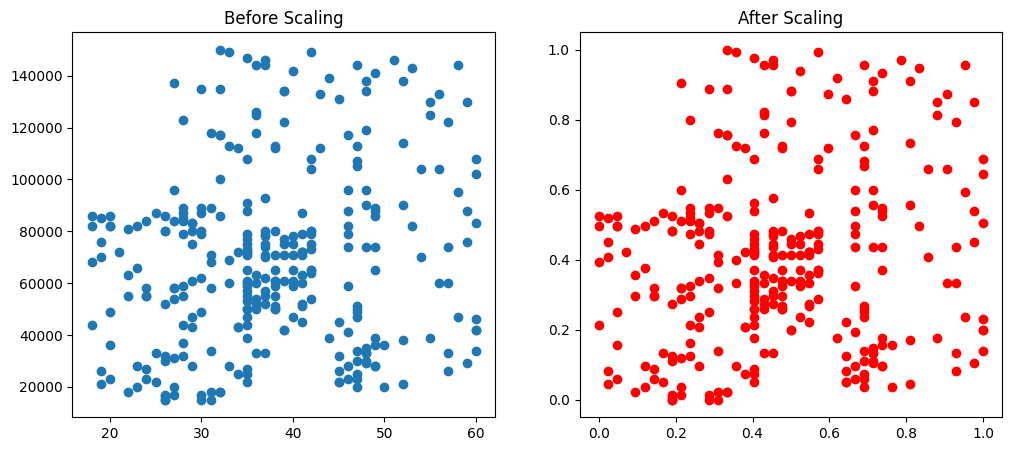

In [126]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))

ax1.scatter(X_train['Age'], X_train['EstimatedSalary'])
ax1.set_title("Before Scaling")

ax2.scatter(X_train_minmax['Age'], X_train_minmax['EstimatedSalary'],color='red')
ax2.set_title("After Scaling")

# when to use which technique ?

* When there is range given use minmax Ex: (CGPA = 0 TO 1)<br>
* If range is unknown then use standerd scaler Ex: (SALARY (0 to ∞))

-----------------------------------------------------------------------------------------------------------------

# Encoding

In [127]:
df2=pd.read_csv("https://raw.githubusercontent.com/campusx-official/100-days-of-machine-learning/main/day26-ordinal-encoding/customer.csv")

In [128]:
df2.head()

,age,gender,review,education,purchased
0,30,Female,Average,School,No
1,68,Female,Poor,UG,No
2,70,Female,Good,PG,No
3,72,Female,Good,PG,No
4,16,Female,Average,UG,No


In [129]:
df2.to_csv("custmor.csv",index=False)

In [130]:
df2.head()

,age,gender,review,education,purchased
0,30,Female,Average,School,No
1,68,Female,Poor,UG,No
2,70,Female,Good,PG,No
3,72,Female,Good,PG,No
4,16,Female,Average,UG,No


In [131]:
df2.sample(5)

,age,gender,review,education,purchased
41,23,Male,Good,PG,Yes
21,32,Male,Average,PG,No
32,92,Male,Average,UG,Yes
3,72,Female,Good,PG,No
35,74,Male,Poor,School,Yes


### ordinal encoding

In [132]:
df2= df2.iloc[:,2:-1]

In [133]:
df2.head()

,review,education
0,Average,School
1,Poor,UG
2,Good,PG
3,Good,PG
4,Average,UG


In [134]:
df2["review"].value_counts()

review
Poor       18
Good       18
Average    14
Name: count, dtype: int64

In [135]:
X_train,X_test = train_test_split(df2,test_size=0.25)

In [136]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import OrdinalEncoder

In [137]:
encoder = OrdinalEncoder(categories=[['Poor','Average','Good'],['School','UG','PG']])

In [138]:
encoder.fit(X_train)

OrdinalEncoder(categories=[['Poor', 'Average', 'Good'], ['School', 'UG', 'PG']])

In [139]:
X_train_encode = encoder.transform(X_train)

In [140]:
X_text_encode = encoder.transform(X_test)

In [141]:
X_train_encode

array([[1., 0.],
       [0., 0.],
       [2., 2.],
       [0., 2.],
       [1., 2.],
       [1., 1.],
       [0., 0.],
       [0., 0.],
       [0., 1.],
       [1., 0.],
       [2., 0.],
       [1., 2.],
       [2., 1.],
       [2., 2.],
       [0., 2.],
       [2., 0.],
       [2., 1.],
       [0., 0.],
       [1., 2.],
       [2., 0.],
       [0., 2.],
       [1., 1.],
       [0., 2.],
       [0., 2.],
       [2., 0.],
       [0., 2.],
       [0., 1.],
       [2., 1.],
       [0., 2.],
       [0., 2.],
       [0., 2.],
       [2., 1.],
       [0., 0.],
       [2., 0.],
       [2., 2.],
       [2., 1.],
       [0., 1.]])

### One hot encoding

done on nominal data

In [142]:
df2 = df2[["gender","age"]]

KeyError: "None of [Index(['gender', 'age'], dtype='object')] are in the [columns]"

In [ ]:
from sklearn.preprocessing import OneHotEncoder

In [ ]:
ohe = OneHotEncoder(sparse=False,dtype=np.int32)

In [ ]:
ohe.fit(df2[["gender"]])

c:\Users\Shubham\anaconda3\envs\ineuron\Lib\site-packages\sklearn\preprocessing\_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


OneHotEncoder(dtype=<class 'numpy.int32'>, sparse=False, sparse_output=False)

In [ ]:
ohe.transform(df2[["gender"]])

array([[1, 0],
       [1, 0],
       [1, 0],
       [1, 0],
       [1, 0],
       [1, 0],
       [0, 1],
       [1, 0],
       [1, 0],
       [0, 1],
       [1, 0],
       [0, 1],
       [0, 1],
       [1, 0],
       [0, 1],
       [0, 1],
       [0, 1],
       [1, 0],
       [0, 1],
       [0, 1],
       [1, 0],
       [0, 1],
       [1, 0],
       [1, 0],
       [1, 0],
       [1, 0],
       [1, 0],
       [1, 0],
       [0, 1],
       [1, 0],
       [0, 1],
       [1, 0],
       [0, 1],
       [1, 0],
       [0, 1],
       [0, 1],
       [1, 0],
       [0, 1],
       [1, 0],
       [0, 1],
       [0, 1],
       [0, 1],
       [1, 0],
       [0, 1],
       [1, 0],
       [0, 1],
       [1, 0],
       [1, 0],
       [1, 0],
       [1, 0]])

Categorical feature :
1. nominal
    * OneHotEncoding
2. Ordinal

### Handle missining values

In [168]:
df3=pd.read_csv("S:/ineuron/STATISTICS/Practical/Data/titanic train.csv")

In [169]:
df3.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [170]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [145]:
df3 = df3[["Age","Fare","SibSp","Survived"]]

In [146]:
df3

,Age,Fare,SibSp,Survived
0,22.0,7.2500,1,0
1,38.0,71.2833,1,1
2,26.0,7.9250,0,1
3,35.0,53.1000,1,1
4,35.0,8.0500,0,0
...,...,...,...,...
886,27.0,13.0000,0,0
887,19.0,30.0000,0,1
888,NaN,23.4500,1,0
889,26.0,30.0000,0,1


In [147]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Age       714 non-null    float64
 1   Fare      891 non-null    float64
 2   SibSp     891 non-null    int64  
 3   Survived  891 non-null    int64  
dtypes: float64(2), int64(2)
memory usage: 28.0 KB


In [148]:
df3.isnull().sum() #Total number of missing values 

Age         177
Fare          0
SibSp         0
Survived      0
dtype: int64

In [149]:
df3.isnull().mean()     #    % of missing values

Age         0.198653
Fare        0.000000
SibSp       0.000000
Survived    0.000000
dtype: float64

### For Imputation (univariate)
<b>numeric column</b>----> use mean,median<br>

<b>cat</b>----> use mode

In [150]:
X_train,X_test=train_test_split(df3,test_size=0.25)

In [151]:
X_train

,Age,Fare,SibSp,Survived
115,21.0,7.9250,0,0
223,NaN,7.8958,0,0
581,39.0,110.8833,1,1
122,32.5,30.0708,1,0
365,30.0,7.2500,0,0
...,...,...,...,...
199,24.0,13.0000,0,0
182,9.0,31.3875,4,0
780,13.0,7.2292,0,1
481,NaN,0.0000,0,0


In [152]:
X_test

,Age,Fare,SibSp,Survived
548,33.0,20.5250,1,0
185,NaN,50.0000,0,0
241,NaN,15.5000,1,1
28,NaN,7.8792,0,1
348,3.0,15.9000,1,1
...,...,...,...,...
133,29.0,26.0000,1,1
167,45.0,27.9000,1,0
195,58.0,146.5208,0,1
459,NaN,7.7500,0,0


now handle missing values 

In [153]:
mean_age = X_train["Age"].mean()

In [154]:
X_train["Age"].fillna(mean_age)

115    21.000000
223    29.580241
581    39.000000
122    32.500000
365    30.000000
         ...    
199    24.000000
182     9.000000
780    13.000000
481    29.580241
565    24.000000
Name: Age, Length: 668, dtype: float64

In [155]:
X_train["Age"].fillna(mean_age).isnull().sum()

0

Whene there outlier in the data we can use median for Imputation

In [157]:
median_age = X_train["Age"].median()

In [165]:
X_train['Age'].fillna(median_age).isnull().sum()

0

### Mode impution
using Sklearn   simpleimputer

#### Now for categorical data 

In [171]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


cabin have 204 null values

In [173]:
df3["Cabin"].mode()

0        B96 B98
1    C23 C25 C27
2             G6
Name: Cabin, dtype: object

In [179]:
df3["Cabin"].fillna(df3["Cabin"].mode()[0])

0      B96 B98
1          C85
2      B96 B98
3         C123
4      B96 B98
        ...   
886    B96 B98
887        B42
888    B96 B98
889       C148
890    B96 B98
Name: Cabin, Length: 891, dtype: object

In [180]:
df3["Cabin"].fillna(df3["Cabin"].mode()[0]).isnull().sum()

0

### multivariate imputer 

use <b>knnimputer</b>